## White wines
* Null hypothesis (H0): The median alcohol content of wines with a higher quality rating is equal to or less than the median alcohol content of wines with a lower quality rating.

* Alternative hypothesis (H1): The median alcohol content of wines with a higher quality rating is greater than the median alcohol content of wines with a lower quality rating.

H0: μ_high ≤ μ_low, where μ_high and μ_low represent the population medians of alcohol content for wines with higher and lower quality ratings, respectively.

H1: μ_high > μ_low.

In [22]:
import pandas as pd
from scipy.stats import ranksums
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('winequality-white.csv', sep=';', header=0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [30]:
df.duplicated().sum()

937

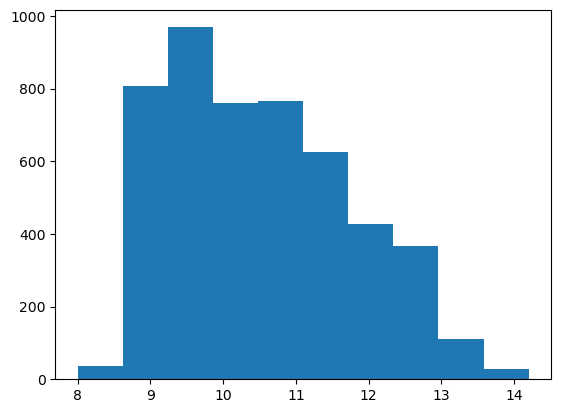

In [24]:
alcohol = df['alcohol']
plt.hist(alcohol)
plt.show() 

The alcohol content is not normally distributed, therefore it`s best to use the Wilcoxon rank-sum test (also known as the Mann-Whitney U test).


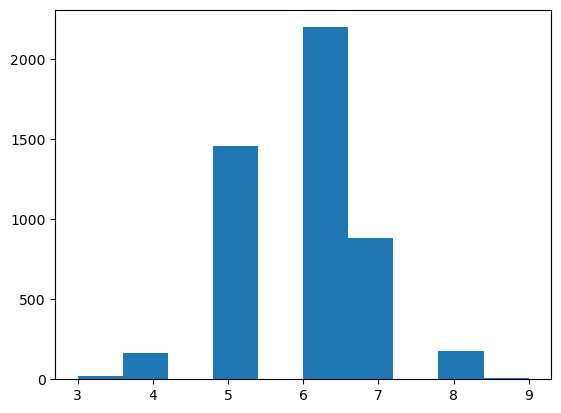

In [25]:
quality = df['quality']
plt.hist(quality)
plt.show() 

Let`s split the data from the midpoint, below 6 will be low quality while above 6 will be high quality.

In [26]:
wine_high_quality = df[df['quality'] > 6]['alcohol']
wine_low_quality = df[df['quality'] <= 6]['alcohol']

In [27]:
print('Wine high quality:')
print(wine_high_quality.head())
print('Wine low quality:')
print(wine_low_quality.head())

Wine high quality:
13    12.4
15    11.4
17    12.8
20    12.8
21    11.0
Name: alcohol, dtype: float64
Wine low quality:
0     8.8
1     9.5
2    10.1
3     9.9
4     9.9
Name: alcohol, dtype: float64


In [28]:
statistic, p_value = ranksums(wine_high_quality, wine_low_quality)

print('Wilcoxon rank-sum test:')
print(f'statistic: {statistic:f}')
print(f'p-value: {p_value:f}')

Wilcoxon rank-sum test:
statistic: 25.186487
p-value: 0.000000


In [33]:
alpha = 0.05
if p_value <= alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


The p-value is less than the significance level (0.05), we can therefore reject the null hypothesis and conclude that there is evidence that the median alcohol content of white wines with a higher quality rating is higher than that of white wines with a lower quality rating.